ref https://github.com/alaporta85/Applied-Data-Science-with-Python-Specialization/blob/master/Course%202%20-%20Applied%20Plotting%2C%20Charting%20%26%20Data%20Representation%20in%20Python/Assignment2.ipynb

In [1]:
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd

In [5]:
def leaflet_plot_stations(binsize, hashid):

    df = pd.read_csv('data/BinSize_d{}.csv'.format(binsize))

    station_locations_by_hash = df[df['hash'] == hashid]

    lons = station_locations_by_hash['LONGITUDE'].tolist()
    lats = station_locations_by_hash['LATITUDE'].tolist()

    plt.figure(figsize=(8,8))

    plt.scatter(lons, lats, c='r', alpha=0.7, s=200)

    return mplleaflet.display()

leaflet_plot_stations(400,'fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89')

In [8]:
import numpy as np
%matplotlib notebook

In [13]:
df = pd.read_csv('data/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv').sort_values('Date')
print (df.dtypes)
df.head()

ID            object
Date          object
Element       object
Data_Value     int64
dtype: object


ID        Date Element  Data_Value
60995  USW00004848  2005-01-01    TMIN           0
17153  USC00207320  2005-01-01    TMAX         150
17155  USC00207320  2005-01-01    TMIN         -11
10079  USW00014833  2005-01-01    TMIN         -44
10073  USW00014833  2005-01-01    TMAX          33

In [14]:
df['Date'] = pd.to_datetime(df['Date'])
print (df.dtypes)
df.head()

ID                    object
Date          datetime64[ns]
Element               object
Data_Value             int64
dtype: object


ID       Date Element  Data_Value
60995  USW00004848 2005-01-01    TMIN           0
17153  USC00207320 2005-01-01    TMAX         150
17155  USC00207320 2005-01-01    TMIN         -11
10079  USW00014833 2005-01-01    TMIN         -44
10073  USW00014833 2005-01-01    TMAX          33

In [28]:
# Day by day TMAX records in period 2005-2014
df_long_max = df[(df['Date'].dt.year < 2015) & (df['Element'] == 'TMAX')]\
           .groupby([df.Date.dt.month, df.Date.dt.day]).max()
df_long_max.drop((2, 29), axis=0, inplace=True)
df_long_max.head()

ID       Date Element  Data_Value
Date Date                                            
1    1     USW00094889 2014-01-01    TMAX         156
     2     USW00094889 2014-01-02    TMAX         139
     3     USW00094889 2014-01-03    TMAX         133
     4     USW00094889 2014-01-04    TMAX         106
     5     USW00094889 2014-01-05    TMAX         128

In [29]:
# Day by day TMIN records in period 2005-2014
df_long_min = df[(df['Date'].dt.year < 2015) & (df['Element'] == 'TMIN')]\
           .groupby([df.Date.dt.month, df.Date.dt.day]).min()
df_long_min.drop((2, 29), axis=0, inplace=True)
df_long_min.head()

ID       Date Element  Data_Value
Date Date                                            
1    1     USC00200032 2005-01-01    TMIN        -160
     2     USC00200032 2005-01-02    TMIN        -267
     3     USC00200032 2005-01-03    TMIN        -267
     4     USC00200032 2005-01-04    TMIN        -261
     5     USC00200032 2005-01-05    TMIN        -150

In [30]:
# Day by day TMAX records in 2015
df2015_max = df[(df['Date'].dt.year == 2015) & (df['Element'] == 'TMAX')]\
           .groupby([df.Date.dt.month, df.Date.dt.day]).max()
df2015_max.head()

ID       Date Element  Data_Value
Date Date                                            
1    1     USW00094889 2015-01-01    TMAX          11
     2     USW00094889 2015-01-02    TMAX          39
     3     USW00014853 2015-01-03    TMAX          39
     4     USW00094889 2015-01-04    TMAX          44
     5     USW00094889 2015-01-05    TMAX          28

In [31]:
# Day by day TIN records in 2015
df2015_min = df[(df['Date'].dt.year == 2015) & (df['Element'] == 'TMIN')]\
           .groupby([df.Date.dt.month, df.Date.dt.day]).min()
df2015_min.head()

ID       Date Element  Data_Value
Date Date                                            
1    1     USC00200032 2015-01-01    TMIN        -133
     2     USC00200032 2015-01-02    TMIN        -122
     3     USC00200032 2015-01-03    TMIN         -67
     4     USC00200032 2015-01-04    TMIN         -88
     5     USC00200032 2015-01-05    TMIN        -155

In [32]:
# Days in 2015 where T was higher than 2005-2014 records
mask1 = df2015_max['Data_Value'] < df_long_max['Data_Value']
mask1

Date  Date
1     1       True
      2       True
      3       True
      4       True
      5       True
              ... 
12    27      True
      28      True
      29      True
      30      True
      31      True
Name: Data_Value, Length: 365, dtype: bool

In [33]:
# Days in 2015 where T was lower than 2005-2014 records
mask2 = df2015_min['Data_Value'] > df_long_min['Data_Value']
mask2

Date  Date
1     1        True
      2        True
      3        True
      4        True
      5       False
              ...  
12    27       True
      28       True
      29       True
      30       True
      31       True
Name: Data_Value, Length: 365, dtype: bool

In [37]:
df2015_max['Data_Value'].mask(mask1, other=np.nan)

Date  Date
1     1      NaN
      2      NaN
      3      NaN
      4      NaN
      5      NaN
              ..
12    27     NaN
      28     NaN
      29     NaN
      30     NaN
      31     NaN
Name: Data_Value, Length: 365, dtype: float64

In [39]:
df2015_min['Data_Value'].mask(mask2, other=np.nan)

Date  Date
1     1         NaN
      2         NaN
      3         NaN
      4         NaN
      5      -155.0
              ...  
12    27        NaN
      28        NaN
      29        NaN
      30        NaN
      31        NaN
Name: Data_Value, Length: 365, dtype: float64

<IPython.core.display.Javascript object>


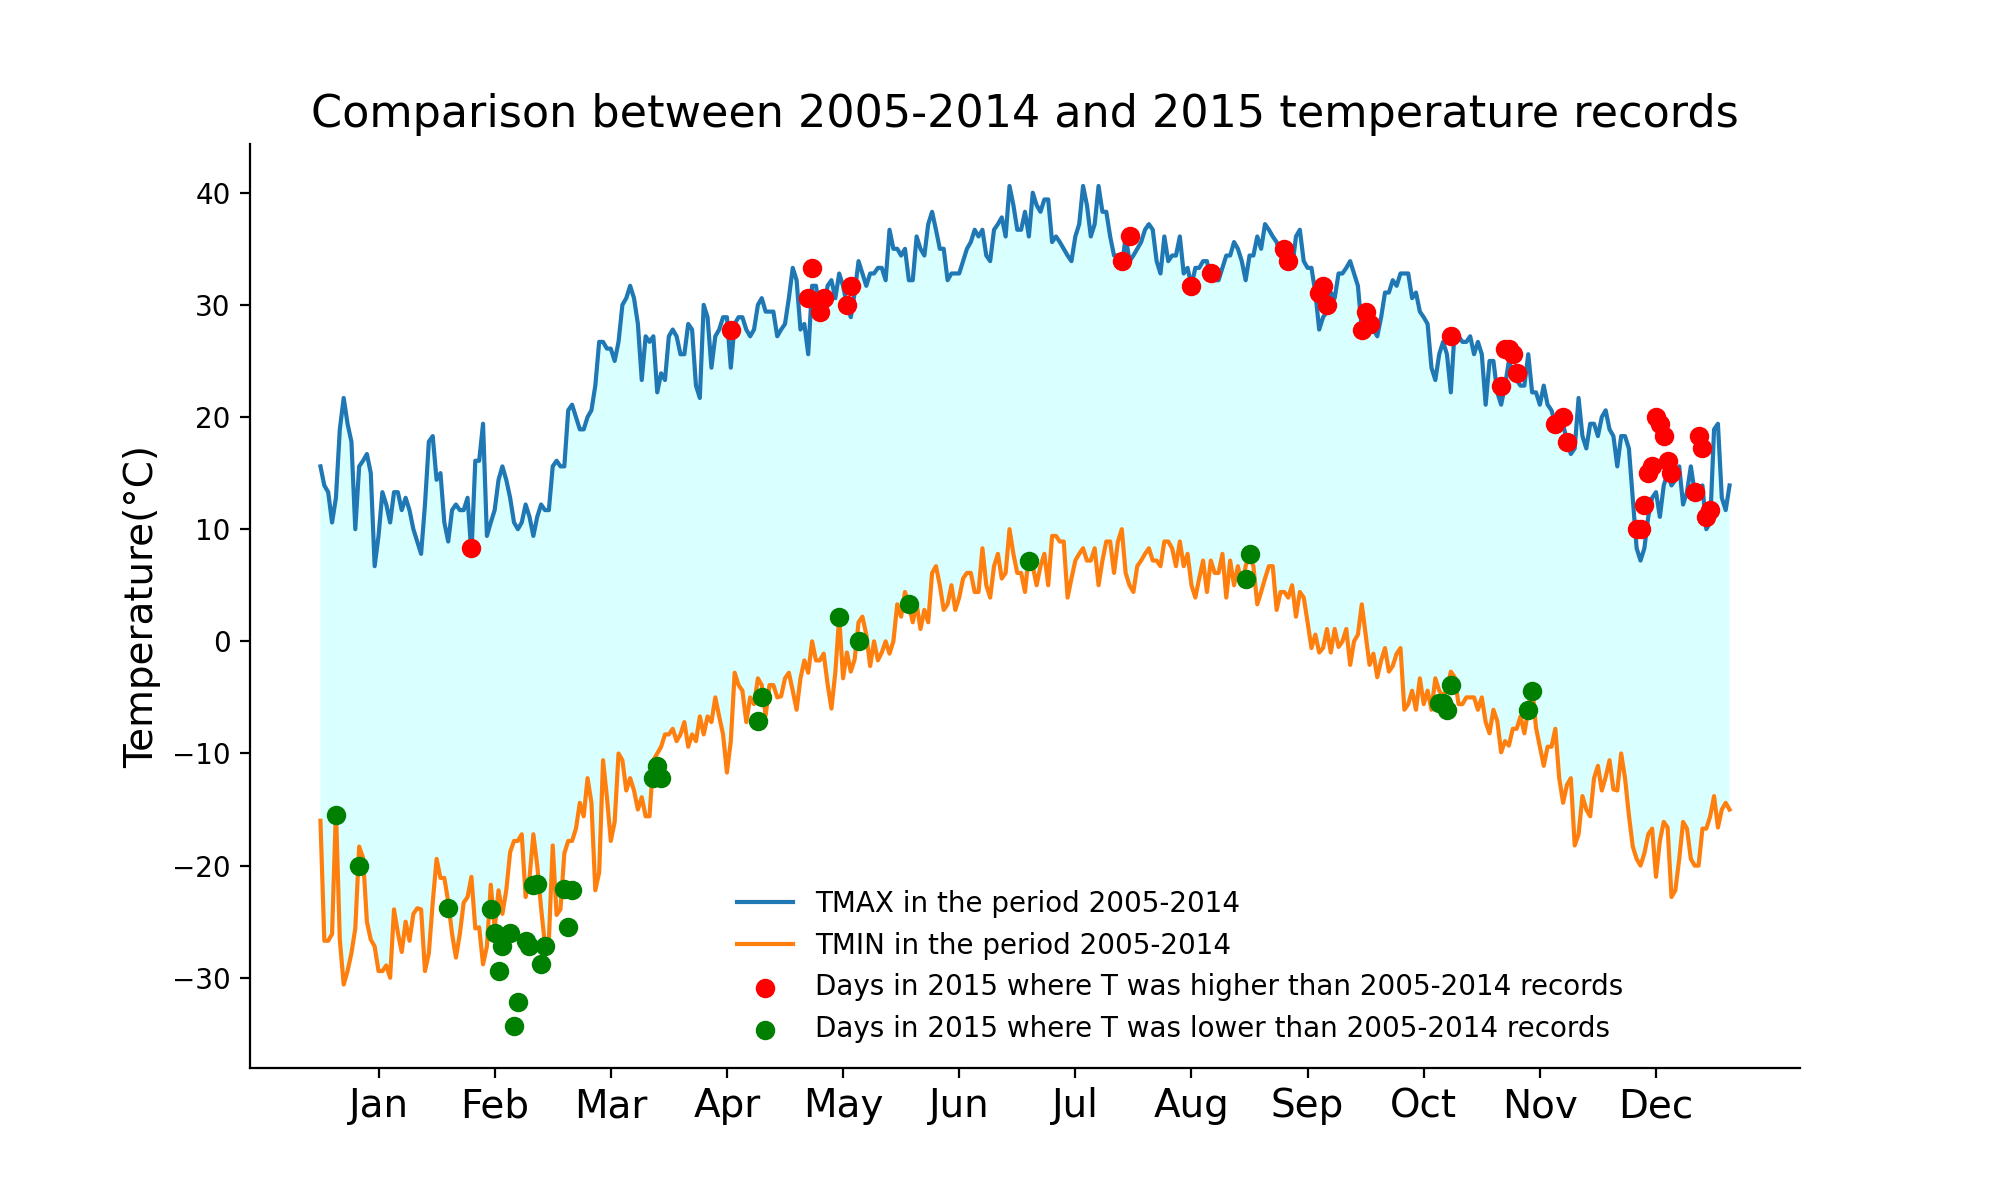

In [48]:
fig, ax = plt.subplots(figsize=(10, 6))

plt.plot(range(365), df_long_max['Data_Value']/10, label='TMAX in the period 2005-2014', zorder=1)
plt.plot(range(365), df_long_min['Data_Value']/10, label='TMIN in the period 2005-2014', zorder=1)
plt.gca().fill_between(range(365),  df_long_max['Data_Value']/10, df_long_min['Data_Value']/10, 
                       facecolor='aqua', alpha=0.15)

plt.scatter(range(365), df2015_max['Data_Value'].mask(mask1, other=np.nan)/10, color='r',\
            label='Days in 2015 where T was higher than 2005-2014 records', zorder=2)
plt.scatter(range(365), df2015_min['Data_Value'].mask(mask2, other=np.nan)/10, color='g',\
            label='Days in 2015 where T was lower than 2005-2014 records', zorder=2)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xticks(range(15, 350, 30),\
           ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],\
          fontsize=14)
plt.ylabel('Temperature(°C)', fontsize=14)
plt.legend(bbox_to_anchor=(0.6, 0.22), frameon=False)
plt.title('Comparison between 2005-2014 and 2015 temperature records', fontsize=16)
plt.show()